In [1]:
import nltk

In [3]:
#nltk.download_shell()

In [5]:
messages = [line.rstrip() for line in open ('C:\\Chandu\\Python\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\smsspamcollection\\SMSSpamCollection')]

In [7]:
len(messages)

5574

In [8]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [11]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('C:\\Chandu\\Python\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\smsspamcollection\\SMSSpamCollection',sep='\t',
                       names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
messages.groupby(by='label').describe().transpose()

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [21]:
messages['length'] = messages['message'].apply(len)

In [22]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

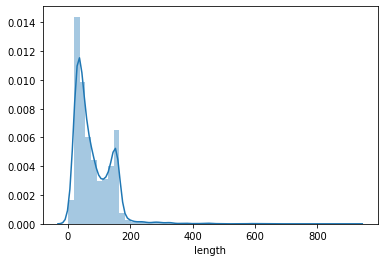

In [25]:
sns.distplot(messages['length'],bins=50)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012E8A5FBF48>,
      dtype=object)

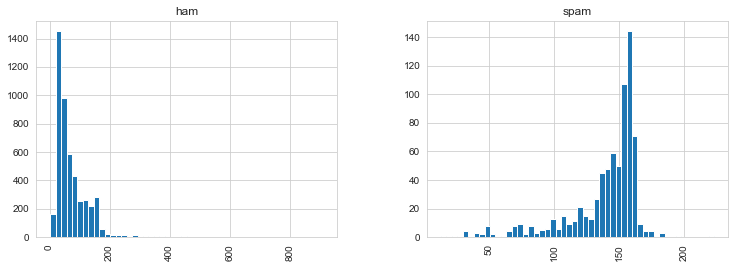

In [31]:
sns.set_style('whitegrid')
messages.hist(column='length',by='label',bins=50,figsize=(12,4))

In [32]:
import string

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
string_1 = 'My ! Name is Sarath.. And I am learning Python @ Nicely !!#'

In [36]:
no_punc = [c for c in string_1 if c not in string.punctuation]

In [37]:
no_punc

['M',
 'y',
 ' ',
 ' ',
 'N',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'S',
 'a',
 'r',
 'a',
 't',
 'h',
 ' ',
 'A',
 'n',
 'd',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n',
 ' ',
 ' ',
 'N',
 'i',
 'c',
 'e',
 'l',
 'y',
 ' ']

In [39]:
''.join(no_punc)

'My  Name is Sarath And I am learning Python  Nicely '

In [40]:
from nltk.corpus import stopwords

In [41]:
my_string = ''.join(no_punc)

In [44]:
my_new_string = [w for w in my_string.split() if w.lower() not in stopwords.words('english')]

In [45]:
my_new_string

['Name', 'Sarath', 'learning', 'Python', 'Nicely']

In [46]:
def convert_to_tokens(messg):
    no_punc_messg = [c for c in messg if c not in string.punctuation]
    no_punc_messg = ''.join(no_punc_messg)
    messg_tokens = [w for w in no_punc_messg.split() if w.lower() not in stopwords.words('english')]
    return messg_tokens

In [47]:
convert_to_tokens(string_1)

['Name', 'Sarath', 'learning', 'Python', 'Nicely']

In [49]:
messages['message'].apply(convert_to_tokens)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
bow_transformer = CountVectorizer(analyzer=convert_to_tokens).fit(messages['message'])

In [58]:
len(bow_transformer.vocabulary_)

11425

In [73]:
mes1 = messages['message'][4]

In [88]:
mes1

"Nah I don't think he goes to usf, he lives around here though"

In [77]:
print(bow_transformer.transform([mes1]))

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [96]:
bow_transformer.get_feature_names()[2948]

'Nah'

In [120]:
bow_transformer.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [97]:
messages_bow = bow_transformer.transform(messages['message'])

In [100]:
messages_bow.size

50548

In [101]:
messages_bow.shape

(5572, 11425)

In [102]:
messages_bow.nnz

50548

In [105]:
messages_bow.data

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [106]:
from sklearn.feature_extraction.text import TfidfTransformer

In [107]:
tfidf_transformer = TfidfTransformer()

In [108]:
tfidf_mes = tfidf_transformer.fit(messages_bow)

In [111]:
print(tfidf_mes.transform(bow_transformer.transform([mes1])))

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [125]:
final_tfidf = tfidf_transformer.transform(messages_bow)

In [126]:
final_tfidf.data

array([0.23026686, 0.19073429, 0.24704652, ..., 0.53921812, 0.48542915,
       0.68818773])

In [124]:
tfidf_mes.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [127]:
from sklearn.naive_bayes import MultinomialNB

In [128]:
m_nb = MultinomialNB()

In [133]:
spam_detect_model = m_nb.fit(final_tfidf,messages['label'])

In [134]:
predict_mesg = spam_detect_model.predict(final_tfidf)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(messages['label'],predict_mesg))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [2]:
import spacy

In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
nlp

In [5]:
doc1  = nlp(u'Johnson’s is one of the go to brands for every day living for us. It’s perfect to get baby/toddler clean but they also make travel size which comes in super handy. It doesn’t burn eyes and smells like a baby. Exactly what I want from a baby shampoo!')

In [12]:
for token in doc1:
    if token.is_stop == False:
        print(token.text,token.lemma_,token.pos_,token.tag_,token.dep_,token.shape_,token.is_alpha,token.is_stop)

Johnson Johnson PROPN NNP compound Xxxxx True False
brands brand NOUN NNS pobj xxxx True False
day day NOUN NN pobj xxx True False
living live VERB VBG acl xxxx True False
. . PUNCT . punct . False False
perfect perfect ADJ JJ acomp xxxx True False
baby baby NOUN NN nmod xxxx True False
/ / SYM SYM punct / False False
toddler toddler NOUN NN nsubj xxxx True False
clean clean ADJ JJ ccomp xxxx True False
travel travel NOUN NN compound xxxx True False
size size NOUN NN dobj xxxx True False
comes come VERB VBZ relcl xxxx True False
super super NOUN NN amod xxxx True False
handy handy ADJ JJ pobj xxxx True False
. . PUNCT . punct . False False
burn burn VERB VB ROOT xxxx True False
eyes eye NOUN NNS dobj xxxx True False
smells smell VERB VBZ conj xxxx True False
like like SCONJ IN prep xxxx True False
baby baby NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
Exactly exactly ADV RB advmod Xxxxx True False
want want VERB VBP ROOT xxxx True False
baby baby NOUN NN compound xxxx T

In [7]:
from spacy import displacy

In [8]:
displacy.render(doc1,style='ent',jupyter=True)

In [9]:
displacy.render(doc1,style='dep',jupyter=True,options={'distance': 110})

In [8]:
for chunk in doc1.noun_chunks:
    print(chunk.text)

the go
brands
every day
us
It
baby/toddler
they
travel size
It
eyes
a baby
Exactly what
I
a baby shampoo


In [11]:
for token1 in doc1:
    print(token1.text, end=' | ')

print('\n----')

for ent in doc1.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Johnson | ’s | is | one | of | the | go | to | brands | for | every | day | living | for | us | . | It | ’s | perfect | to | get | baby | / | toddler | clean | but | they | also | make | travel | size | which | comes | in | super | handy | . | It | does | n’t | burn | eyes | and | smells | like | a | baby | . | Exactly | what | I | want | from | a | baby | shampoo | ! | 
----
Johnson - PERSON - People, including fictional
every day - DATE - Absolute or relative dates or periods


In [19]:
len(doc1.vocab)

1340242